#Регрессия

In [ ]:
import pandas as pd 
import sklearn as skl
import numpy as np

In [ ]:
data = pd.read_csv('real_estate_valuation_preprocessed.csv')
data

Nomber  Transaction date  ...  Longitude  House price of unit area
0         1       2012.916667  ...  121.54024                      37.9
1         2       2012.916667  ...  121.53951                      42.2
2         3       2013.583333  ...  121.54391                      47.3
3         4       2013.500000  ...  121.54391                      54.8
4         5       2012.833333  ...  121.54245                      43.1
..      ...               ...  ...        ...                       ...
409     410       2013.000000  ...  121.50381                      15.4
410     411       2012.666667  ...  121.54310                      50.0
411     412       2013.250000  ...  121.53986                      40.6
412     413       2013.000000  ...  121.54067                      52.5
413     414       2013.500000  ...  121.54310                      63.9

[414 rows x 8 columns]

In [ ]:
data = data.drop('Nomber',1) #убираем ненужный столбец индексов
data = data.drop('Latitude',1)
data = data.drop('Longitude',1)

In [ ]:
data[data['House price of unit area']>71]['House price of unit area'].count()

4

In [ ]:
4/114*100

3.508771929824561

Видим, что это действительно выбросы, избавимся от них для улучшения качества регрессии.

In [ ]:
data=data[data['House price of unit area']<71]

Избавились от выбросов по цене дома превышающих 70. Можно было бы избавиться от выбросов, их 3 штуки, ниже 12, но! Протестировал на всех алгоритмах. Результат: на всех алгоритмах качество либо ниже, либо такое же, кроме регрессии дерева без параметров, там качество было 0.77

In [ ]:
X = data.drop('House price of unit area',1)
y = data['House price of unit area'].values

Нормировка ни к чему хорошему не привела, пробовал тоже на всех алгоритмах, оставил код закомменченным, чтобы показать, что пытался.

In [ ]:
X=X.values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,
                                                    random_state=0) #делим на тест и тренировку

##Bagging
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingRegressor.html#sklearn.ensemble.BaggingRegressor

In [ ]:
from sklearn.ensemble import BaggingRegressor

###По умолчанию дерево

In [ ]:
reg = BaggingRegressor()


In [ ]:
%%time
reg.fit(X_train,y_train)

CPU times: user 22 ms, sys: 0 ns, total: 22 ms
Wall time: 23.7 ms


BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=None, verbose=0,
                 warm_start=False)

In [ ]:
def metric(y_true,predskaz): #ФУНКЦИЯ ДЛЯ ВЫВОДА МЕТРИК, ЧТОБЫ НЕ КОПИПАСТИТЬ
  print('R2 = ', skl.metrics.r2_score(y_true,predskaz))
  print('Mean Square Error = ', skl.metrics.mean_squared_error(y_true,predskaz))
  print('Root Mean Square Error = ', skl.metrics.mean_squared_error(y_true,predskaz,squared=False))
  print('mean absolute error = ', skl.metrics.mean_absolute_error(y_true,predskaz))

In [ ]:
pred = reg.predict(X_test)
metric(y_test,pred)

R2 =  0.7852005767529816
Mean Square Error =  30.459526552263373
Root Mean Square Error =  5.519014998372751
mean absolute error =  4.217148148148147


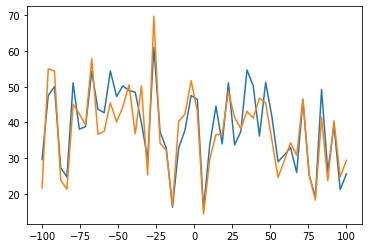

In [ ]:
import matplotlib.pyplot as plt
fig = plt.subplots()
plt.plot(np.linspace(-100, 100,50),pred[:100:2])
plt.plot(np.linspace(-100, 100,50),y_test[:100:2]) #оранжевый

Сразу же получили результат лучше, чем был у дерева (без подбора)  без композиции

In [ ]:
reg.get_params().keys()

dict_keys(['base_estimator', 'bootstrap', 'bootstrap_features', 'max_features', 'max_samples', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [ ]:
parameters = {'n_estimators': range(8,15),
              'max_samples': range(1,6)}

In [ ]:
from sklearn import model_selection
grid_cv = model_selection.GridSearchCV(reg, parameters, scoring = 'r2')

In [ ]:
%time
grid_cv.fit(X_train, y_train)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.3 µs


GridSearchCV(cv=None, error_score=nan,
             estimator=BaggingRegressor(base_estimator=None, bootstrap=True,
                                        bootstrap_features=False,
                                        max_features=1.0, max_samples=1.0,
                                        n_estimators=10, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'max_samples': range(1, 6),
                         'n_estimators': range(8, 15)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

In [ ]:
grid_cv.best_params_

{'max_samples': 5, 'n_estimators': 8}

In [ ]:
grid_cv.best_score_

0.5002997568439804

In [ ]:
reg = BaggingRegressor(max_samples=5, n_estimators=8)

In [ ]:
%%time
reg.fit(X_train,y_train)

CPU times: user 14.7 ms, sys: 10 µs, total: 14.7 ms
Wall time: 19.2 ms


BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=5, n_estimators=8, n_jobs=None,
                 oob_score=False, random_state=None, verbose=0,
                 warm_start=False)

In [ ]:
pred = reg.predict(X_test)
metric(y_test,pred)

R2 =  0.5704641304836464
Mean Square Error =  60.91012268518518
Root Mean Square Error =  7.8044937494487865
mean absolute error =  6.161851851851851


Результат стал хуже после подбора, хотя значения по умолчанию были включены в интервал подбора.

###LASSO

In [ ]:
lasso = skl.linear_model.Lasso()
reg = BaggingRegressor(base_estimator=lasso)

In [ ]:
%%time
reg.fit(X_train,y_train)

CPU times: user 18.1 ms, sys: 987 µs, total: 19 ms
Wall time: 23.4 ms


BaggingRegressor(base_estimator=Lasso(alpha=1.0, copy_X=True,
                                      fit_intercept=True, max_iter=1000,
                                      normalize=False, positive=False,
                                      precompute=False, random_state=None,
                                      selection='cyclic', tol=0.0001,
                                      warm_start=False),
                 bootstrap=True, bootstrap_features=False, max_features=1.0,
                 max_samples=1.0, n_estimators=10, n_jobs=None, oob_score=False,
                 random_state=None, verbose=0, warm_start=False)

In [ ]:
pred = reg.predict(X_test)
metric(y_test,pred)

R2 =  0.6346648331871543
Mean Square Error =  51.80617361907142
Root Mean Square Error =  7.1976505624454585
mean absolute error =  5.701684808220579


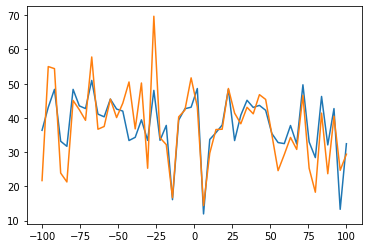

In [ ]:
fig = plt.subplots()
plt.plot(np.linspace(-100, 100,50),pred[:100:2])
plt.plot(np.linspace(-100, 100,50),y_test[:100:2]) #оранжевый

In [ ]:
parameters = {'alpha': np.arange(0.0050,0.0060,0.0001),
              'max_iter': np.arange(100,300,50),
              'selection': ['cyclic','random'],
              'tol': [0.00001,0.0001,0.01,0.1,1,0.000001],}

In [ ]:
grid_cv = model_selection.GridSearchCV(lasso, parameters, scoring = 'r2')

In [ ]:
grid_cv.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([0.005 , 0.0051, 0.0052, 0.0053, 0.0054, 0.0055, 0.0056, 0.0057,
       0.0058, 0.0059]),
                         'max_iter': array([100, 150, 200, 250]),
                         'selection': ['cyclic', 'random'],
                         'tol': [1e-05, 0.0001, 0.01, 0.1, 1, 1e-06]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

In [ ]:
grid_cv.best_params_

{'alpha': 0.005600000000000002,
 'max_iter': 150,
 'selection': 'random',
 'tol': 0.1}

In [ ]:
lasso = skl.linear_model.Lasso(alpha=0.005600000000000002,max_iter=150, 
                               selection='random',tol=0.1)

In [ ]:
reg = BaggingRegressor(base_estimator=lasso)

In [ ]:
%%time
reg.fit(X_train,y_train)

CPU times: user 17 ms, sys: 0 ns, total: 17 ms
Wall time: 24.5 ms


BaggingRegressor(base_estimator=Lasso(alpha=1.0, copy_X=True,
                                      fit_intercept=True, max_iter=1000,
                                      normalize=False, positive=False,
                                      precompute=False, random_state=None,
                                      selection='cyclic', tol=0.0001,
                                      warm_start=False),
                 bootstrap=True, bootstrap_features=False, max_features=1.0,
                 max_samples=1.0, n_estimators=10, n_jobs=None, oob_score=False,
                 random_state=None, verbose=0, warm_start=False)

In [ ]:
pred = reg.predict(X_test)
metric(y_test,pred)

R2 =  0.634679798754887
Mean Square Error =  51.80405143410075
Root Mean Square Error =  7.1975031388739765
mean absolute error =  5.74093774262088


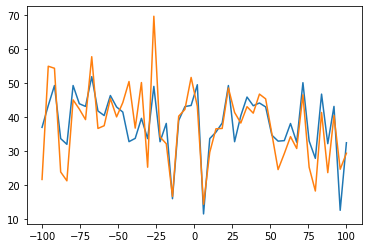

In [ ]:
fig = plt.subplots()
plt.plot(np.linspace(-100, 100,50),pred[:100:2])
plt.plot(np.linspace(-100, 100,50),y_test[:100:2]) #оранжевый

##Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
reg = GradientBoostingRegressor()

In [ ]:
%%time
reg.fit(X_train,y_train)

CPU times: user 57.5 ms, sys: 982 µs, total: 58.4 ms
Wall time: 63.7 ms


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
pred = reg.predict(X_test)
metric(y_test,pred)

R2 =  0.7753120816393624
Mean Square Error =  31.861759737632923
Root Mean Square Error =  5.6446221961822145
mean absolute error =  4.2983986903174


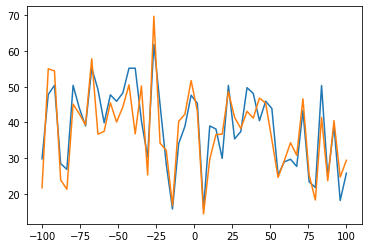

In [ ]:
fig = plt.subplots()
plt.plot(np.linspace(-100, 100,50),pred[:100:2])
plt.plot(np.linspace(-100, 100,50),y_test[:100:2]) #оранжевый

In [ ]:
reg.get_params().keys()

dict_keys(['alpha', 'ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'presort', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [ ]:
parameters = {'loss': ['ls', 'lad', 'huber', 'quantile'],
              'n_estimators': range(80,120,2)}

In [ ]:
grid_cv = model_selection.GridSearchCV(reg, parameters, scoring = 'r2')

In [ ]:
grid_cv.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
              

In [ ]:
grid_cv.best_params_

{'loss': 'ls', 'n_estimators': 80}

In [ ]:
grid_cv.best_score_

0.6579283484069354

In [ ]:
reg = GradientBoostingRegressor(loss='ls',n_estimators=80)

In [ ]:
%%time
reg.fit(X_train,y_train)

CPU times: user 41.8 ms, sys: 0 ns, total: 41.8 ms
Wall time: 46.1 ms


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=80,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
pred = reg.predict(X_test)
metric(y_test,pred)

R2 =  0.7747089416900477
Mean Square Error =  31.94728770145691
Root Mean Square Error =  5.652193176233179
mean absolute error =  4.274326192038019


Совсем маленько снизился результат (незначительно).

##Stecking

In [ ]:
from sklearn.linear_model import RidgeCV
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor

In [ ]:
estimators = [('lr', RidgeCV()),('svr', LinearSVR())]

In [ ]:
reg = StackingRegressor(estimators=estimators, final_estimator=RandomForestRegressor())

In [ ]:
%%time
reg.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

CPU times: user 241 ms, sys: 4 ms, total: 245 ms
Wall time: 246 ms


StackingRegressor(cv=None,
                  estimators=[('lr',
                               RidgeCV(alphas=array([ 0.1,  1. , 10. ]),
                                       cv=None, fit_intercept=True,
                                       gcv_mode=None, normalize=False,
                                       scoring=None, store_cv_values=False)),
                              ('svr',
                               LinearSVR(C=1.0, dual=True, epsilon=0.0,
                                         fit_intercept=True,
                                         intercept_scaling=1.0,
                                         loss='epsilon_insensitive',
                                         max_iter=1000, random_state=None,
                                         tol=0.0001, verbose=0))],
                  final_es...
                                                        ccp_alpha=0.0,
                                                        criterion='mse',
                          

In [ ]:
pred = reg.predict(X_test)
metric(y_test,pred)

R2 =  0.6483752762016028
Mean Square Error =  49.86197099166663
Root Mean Square Error =  7.061300941870884
mean absolute error =  5.304455555555553


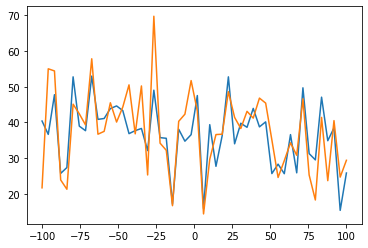

In [ ]:
fig = plt.subplots()
plt.plot(np.linspace(-100, 100,50),pred[:100:2])
plt.plot(np.linspace(-100, 100,50),y_test[:100:2]) #оранжевый

#Классификация

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('contraceptive_method_choice_preprocessed.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   Wife's age                    1473 non-null   int64
 1   Wife's education              1473 non-null   int64
 2   Husband's education           1473 non-null   int64
 3   Number of children ever born  1473 non-null   int64
 4   Wife's religion               1473 non-null   int64
 5   Wife's now working?           1473 non-null   int64
 6   Husband's occupation          1473 non-null   int64
 7   Standard-of-living index      1473 non-null   int64
 8   Media exposure                1473 non-null   int64
 9   Contraceptive method used     1473 non-null   int64
dtypes: int64(10)
memory usage: 115.2 KB


Пустых ячеек не обнаружено, видим, что объектов 1473, Dtype соответствующий.

In [ ]:
data[data['Number of children ever born']>8].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45 entries, 1 to 1415
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   Wife's age                    45 non-null     int64
 1   Wife's education              45 non-null     int64
 2   Husband's education           45 non-null     int64
 3   Number of children ever born  45 non-null     int64
 4   Wife's religion               45 non-null     int64
 5   Wife's now working?           45 non-null     int64
 6   Husband's occupation          45 non-null     int64
 7   Standard-of-living index      45 non-null     int64
 8   Media exposure                45 non-null     int64
 9   Contraceptive method used     45 non-null     int64
dtypes: int64(10)
memory usage: 3.9 KB


На этапе визуализации были обнаружены выбросы, для чистоты нужно от них избавиться.

In [ ]:
round(45/1473*100,3) #процентное соотношение выбросов ко всему датасету

3.055

In [ ]:
data = data[data['Number of children ever born']<=8] #чистим выбросы

In [ ]:
data.info() #проверка удаления выбросов

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1428 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   Wife's age                    1428 non-null   int64
 1   Wife's education              1428 non-null   int64
 2   Husband's education           1428 non-null   int64
 3   Number of children ever born  1428 non-null   int64
 4   Wife's religion               1428 non-null   int64
 5   Wife's now working?           1428 non-null   int64
 6   Husband's occupation          1428 non-null   int64
 7   Standard-of-living index      1428 non-null   int64
 8   Media exposure                1428 non-null   int64
 9   Contraceptive method used     1428 non-null   int64
dtypes: int64(10)
memory usage: 122.7 KB


Среднее значение кризнака 'Number of children ever born' пришло в "норму".

In [ ]:
data.describe()

Wife's age  Wife's education  ...  Media exposure  Contraceptive method used
count  1428.000000       1428.000000  ...     1428.000000                1428.000000
mean     32.212185          2.979692  ...        0.071429                   1.925070
std       8.108787          1.006778  ...        0.257630                   0.875975
min      16.000000          1.000000  ...        0.000000                   1.000000
25%      26.000000          2.000000  ...        0.000000                   1.000000
50%      31.000000          3.000000  ...        0.000000                   2.000000
75%      38.000000          4.000000  ...        0.000000                   3.000000
max      49.000000          4.000000  ...        1.000000                   3.000000

[8 rows x 10 columns]

Не стоит нормировать возраст (возраст немного выбивается из общей концепции), т.к. проверил, что точность снижается)

In [ ]:
X = data.drop('Contraceptive method used',1).values
y = data['Contraceptive method used'].values

In [ ]:
print(X,y, sep='\n') #просто посмотреть, то ли мы разделили

[[24  2  3 ...  2  3  0]
 [43  2  3 ...  3  4  0]
 [36  3  3 ...  3  2  0]
 ...
 [39  3  3 ...  1  4  0]
 [33  3  3 ...  2  2  0]
 [17  3  3 ...  2  4  0]]
[1 1 1 ... 3 3 3]


In [ ]:
data

Wife's age  Wife's education  ...  Media exposure  Contraceptive method used
0             24                 2  ...               0                          1
2             43                 2  ...               0                          1
4             36                 3  ...               0                          1
5             19                 4  ...               0                          1
6             38                 2  ...               0                          1
...          ...               ...  ...             ...                        ...
1468          33                 4  ...               0                          3
1469          33                 4  ...               0                          3
1470          39                 3  ...               0                          3
1471          33                 3  ...               0                          3
1472          17                 3  ...               0                          3

[1428 rows x 10 columns]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) #делим на тест и тренировку

##Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier

###По умолчанию дерево

In [ ]:
reg = BaggingClassifier()

In [ ]:
%%time
reg.fit(X_train,y_train)

CPU times: user 31.9 ms, sys: 996 µs, total: 32.9 ms
Wall time: 37.1 ms


BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
pred = reg.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[136  16  34]
 [ 24  43  21]
 [ 50  40  65]]
              precision    recall  f1-score   support

           1       0.65      0.73      0.69       186
           2       0.43      0.49      0.46        88
           3       0.54      0.42      0.47       155

    accuracy                           0.57       429
   macro avg       0.54      0.55      0.54       429
weighted avg       0.57      0.57      0.56       429



Результат лучше, чем был у дерева решений без композиции.

In [ ]:
reg.get_params().keys()

dict_keys(['base_estimator', 'bootstrap', 'bootstrap_features', 'max_features', 'max_samples', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [ ]:
parameters = {'n_estimators': range(8,15),
              'max_samples': range(1,6)}

In [ ]:
from sklearn import model_selection
grid_cv = model_selection.GridSearchCV(reg, parameters, scoring = 'accuracy')

In [ ]:
grid_cv.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=BaggingClassifier(base_estimator=None, bootstrap=True,
                                         bootstrap_features=False,
                                         max_features=1.0, max_samples=1.0,
                                         n_estimators=10, n_jobs=None,
                                         oob_score=False, random_state=None,
                                         verbose=0, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'max_samples': range(1, 6),
                         'n_estimators': range(8, 15)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [ ]:
grid_cv.best_params_

{'max_samples': 3, 'n_estimators': 13}

In [ ]:
grid_cv.best_score_

0.4484673366834171

In [ ]:
reg = BaggingClassifier(max_samples=3, n_estimators=13)

In [ ]:
%%time
reg.fit(X_train,y_train)

CPU times: user 25 ms, sys: 2 ms, total: 27 ms
Wall time: 29.6 ms


BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=3, n_estimators=13, n_jobs=None,
                  oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [ ]:
pred = reg.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[94 49 43]
 [27 52  9]
 [49 64 42]]
              precision    recall  f1-score   support

           1       0.55      0.51      0.53       186
           2       0.32      0.59      0.41        88
           3       0.45      0.27      0.34       155

    accuracy                           0.44       429
   macro avg       0.44      0.46      0.43       429
weighted avg       0.47      0.44      0.44       429



Получили хуже, чем без подбора.

###Logistic

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
reg = BaggingClassifier(base_estimator=LogisticRegression())

In [ ]:
%%time
reg.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


CPU times: user 739 ms, sys: 3.97 ms, total: 743 ms
Wall time: 757 ms


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


BaggingClassifier(base_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                    dual=False,
                                                    fit_intercept=True,
                                                    intercept_scaling=1,
                                                    l1_ratio=None, max_iter=100,
                                                    multi_class='auto',
                                                    n_jobs=None, penalty='l2',
                                                    random_state=None,
                                                    solver='lbfgs', tol=0.0001,
                                                    verbose=0,
                                                    warm_start=False),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=1.0, n_estimators=10, n_jobs=None,
                  oob_score=False, random_state=None,

In [ ]:
pred = reg.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[129  17  40]
 [ 25  32  31]
 [ 51  34  70]]
              precision    recall  f1-score   support

           1       0.63      0.69      0.66       186
           2       0.39      0.36      0.37        88
           3       0.50      0.45      0.47       155

    accuracy                           0.54       429
   macro avg       0.50      0.50      0.50       429
weighted avg       0.53      0.54      0.53       429



In [ ]:
parameters = {'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C' : [1,3],
    'solver' : ['liblinear','sag','saga','lbfgs','newton-cg'],
    'max_iter':[150]}

In [ ]:
grid_cv = model_selection.GridSearchCV(LogisticRegression(), parameters, scoring = 'accuracy')

In [ ]:
grid_cv.fit(X_train, y_train)

In [ ]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

0.5235728643216081
{'C': 1, 'max_iter': 150, 'penalty': 'none', 'solver': 'newton-cg'}


In [ ]:
clf = LogisticRegression(C=1, max_iter=150, penalty='none', solver='newton-cg')

In [ ]:
reg = BaggingClassifier(base_estimator=clf)

In [ ]:
%%time
reg.fit(X_train,y_train)

CPU times: user 860 ms, sys: 1.98 ms, total: 862 ms
Wall time: 868 ms


BaggingClassifier(base_estimator=LogisticRegression(C=1, class_weight=None,
                                                    dual=False,
                                                    fit_intercept=True,
                                                    intercept_scaling=1,
                                                    l1_ratio=None, max_iter=150,
                                                    multi_class='auto',
                                                    n_jobs=None, penalty='none',
                                                    random_state=None,
                                                    solver='newton-cg',
                                                    tol=0.0001, verbose=0,
                                                    warm_start=False),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=1.0, n_estimators=10, n_jobs=None,
                  oob_score=False, random_state=N

In [ ]:
pred = reg.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[131  11  44]
 [ 26  34  28]
 [ 54  28  73]]
              precision    recall  f1-score   support

           1       0.62      0.70      0.66       186
           2       0.47      0.39      0.42        88
           3       0.50      0.47      0.49       155

    accuracy                           0.55       429
   macro avg       0.53      0.52      0.52       429
weighted avg       0.55      0.55      0.55       429



##Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
reg = GradientBoostingClassifier()


In [ ]:
%%time
reg.fit(X_train,y_train)

CPU times: user 459 ms, sys: 1 µs, total: 459 ms
Wall time: 462 ms


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
pred = reg.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[125  16  45]
 [ 18  44  26]
 [ 41  43  71]]
              precision    recall  f1-score   support

           1       0.68      0.67      0.68       186
           2       0.43      0.50      0.46        88
           3       0.50      0.46      0.48       155

    accuracy                           0.56       429
   macro avg       0.54      0.54      0.54       429
weighted avg       0.56      0.56      0.56       429



In [ ]:
reg.get_params().keys()

dict_keys(['ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'presort', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [ ]:
parameters = {'loss': ['deviance', 'exponential'],
              'n_estimators': range(80,120,2)}

In [ ]:
grid_cv = model_selection.GridSearchCV(reg, parameters, scoring = 'accuracy')

In [ ]:
grid_cv.fit(X_train, y_train)

In [ ]:
grid_cv.best_params_

{'loss': 'deviance', 'n_estimators': 90}

In [ ]:
grid_cv.best_score_

0.5556231155778895

In [ ]:
reg = GradientBoostingClassifier(loss='deviance',n_estimators=90)

In [ ]:
%%time
reg.fit(X_train,y_train)

CPU times: user 409 ms, sys: 0 ns, total: 409 ms
Wall time: 410 ms


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=90,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
pred = reg.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[124  17  45]
 [ 18  43  27]
 [ 42  45  68]]
              precision    recall  f1-score   support

           1       0.67      0.67      0.67       186
           2       0.41      0.49      0.45        88
           3       0.49      0.44      0.46       155

    accuracy                           0.55       429
   macro avg       0.52      0.53      0.53       429
weighted avg       0.55      0.55      0.55       429



##Stecking

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier

In [ ]:
estimators = [
              ('KN',KNeighborsClassifier()),
              ('tree',tree.DecisionTreeClassifier()),
              ('GNB',GaussianNB()),
              ('svm',svm.SVC())
              ]

In [ ]:
reg = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

In [ ]:
%%time
reg.fit(X_train,y_train)

CPU times: user 365 ms, sys: 1.99 ms, total: 367 ms
Wall time: 370 ms


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


StackingClassifier(cv=None,
                   estimators=[('KN',
                                KNeighborsClassifier(algorithm='auto',
                                                     leaf_size=30,
                                                     metric='minkowski',
                                                     metric_params=None,
                                                     n_jobs=None, n_neighbors=5,
                                                     p=2, weights='uniform')),
                               ('tree',
                                DecisionTreeClassifier(ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
            

In [ ]:
pred = reg.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[136  12  38]
 [ 21  32  35]
 [ 54  23  78]]
              precision    recall  f1-score   support

           1       0.64      0.73      0.69       186
           2       0.48      0.36      0.41        88
           3       0.52      0.50      0.51       155

    accuracy                           0.57       429
   macro avg       0.55      0.53      0.54       429
weighted avg       0.56      0.57      0.57       429



#Выводы

Во-первых, хочется сказать, что алгоритмы отработали В СРЕДНЕМ лучше, чем без композиции. Но среди базовых алгоритмов выделилось дерево решений с точностью 0.79. Такого результата через композицию не удалось добиться, но повторюсь, средний результат стал выше, чем у "голых" базовых алгоритмов. 

Во-вторых, стоит отметить, что скорость работы лишь на немного отличается от скорости работы базовых алгоритмов, но, я думаю, не стоит делать поспешных выводов, потому что выборка не сильно большая. На больших данных время может значительно увеличиться по сравнению с работой базовых алгоритмов. Но, сейчас мы наблюдаем лишь незначительную задержку в обучении алгоритмов (но всё же дольше!). 

В-третьих, результаты по регрессии довольно хорошие. Алгоритмы предугадывают тенденцию движения цены, иногда выбиваются от действительной цены, но не кретично. Таких слов нельзя сказать о классификации, у которой точность максимум 57%, т.е. чуть больше половины. (я надеюсь, что это происходит из-за таких данных, потому что я делаю всё что могу, тщательно разбираюсь, трачу много времени, но безуспешно)

#CatBoostRegressor

In [3]:
import pandas as pd 
import sklearn as skl
import numpy as np
%pip install catboost
from catboost import CatBoostRegressor

     |████████████████████████████████| 65.7MB 56kB/s 


In [5]:
data = pd.read_csv('real_estate_valuation_preprocessed.csv')
data

Nomber  Transaction date  ...  Longitude  House price of unit area
0         1       2012.916667  ...  121.54024                      37.9
1         2       2012.916667  ...  121.53951                      42.2
2         3       2013.583333  ...  121.54391                      47.3
3         4       2013.500000  ...  121.54391                      54.8
4         5       2012.833333  ...  121.54245                      43.1
..      ...               ...  ...        ...                       ...
409     410       2013.000000  ...  121.50381                      15.4
410     411       2012.666667  ...  121.54310                      50.0
411     412       2013.250000  ...  121.53986                      40.6
412     413       2013.000000  ...  121.54067                      52.5
413     414       2013.500000  ...  121.54310                      63.9

[414 rows x 8 columns]

In [6]:
data = data.drop('Nomber',1) #убираем ненужный столбец индексов
data = data.drop('Latitude',1)
data = data.drop('Longitude',1)

In [7]:
data[data['House price of unit area']>71]['House price of unit area'].count()

4

In [8]:
4/114*100

3.508771929824561

Видим, что это действительно выбросы, избавимся от них для улучшения качества регрессии.

In [9]:
data=data[data['House price of unit area']<71]

Избавились от выбросов по цене дома превышающих 70. Можно было бы избавиться от выбросов, их 3 штуки, ниже 12, но! Протестировал на всех алгоритмах. Результат: на всех алгоритмах качество либо ниже, либо такое же, кроме регрессии дерева без параметров, там качество было 0.77

In [10]:
X = data.drop('House price of unit area',1)
y = data['House price of unit area'].values

Нормировка ни к чему хорошему не привела, пробовал тоже на всех алгоритмах, оставил код закомменченным, чтобы показать, что пытался.

In [11]:
X=X.values

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,
                                                    random_state=0) #делим на тест и тренировку

In [16]:
reg = CatBoostRegressor()


In [ ]:
%%time
reg.fit(X_train,y_train)

In [18]:
def metric(y_true,predskaz): #ФУНКЦИЯ ДЛЯ ВЫВОДА МЕТРИК, ЧТОБЫ НЕ КОПИПАСТИТЬ
  print('R2 = ', skl.metrics.r2_score(y_true,predskaz))
  print('Mean Square Error = ', skl.metrics.mean_squared_error(y_true,predskaz))
  print('Root Mean Square Error = ', skl.metrics.mean_squared_error(y_true,predskaz,squared=False))
  print('mean absolute error = ', skl.metrics.mean_absolute_error(y_true,predskaz))

In [19]:
pred = reg.predict(X_test)
metric(y_test,pred)

R2 =  0.7726508854310042
Mean Square Error =  32.23912935689886
Root Mean Square Error =  5.6779511583756035
mean absolute error =  4.2897447152809125


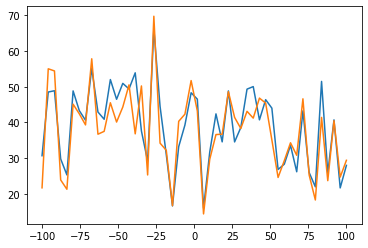

In [20]:
import matplotlib.pyplot as plt
fig = plt.subplots()
plt.plot(np.linspace(-100, 100,50),pred[:100:2])
plt.plot(np.linspace(-100, 100,50),y_test[:100:2]) #оранжевый

In [54]:
parameters = {'iterations': range(1,22),
              'depth': range(1,12)}
skl.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [55]:
from sklearn import model_selection
grid_cv = model_selection.GridSearchCV(reg, parameters, scoring = 'r2')

In [56]:
grid_cv.fit(X_train, y_train)

Выходные данные были обрезаны до нескольких последних строк (5000).
0:	learn: 9.6936941	total: 1.65ms	remaining: 4.94ms
1:	learn: 7.9087863	total: 3.22ms	remaining: 3.22ms
2:	learn: 7.1396833	total: 4.79ms	remaining: 1.6ms
3:	learn: 6.4754481	total: 6.32ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 9.9661744	total: 1.68ms	remaining: 5.04ms
1:	learn: 8.5055584	total: 2.15ms	remaining: 2.15ms
2:	learn: 7.6578583	total: 4ms	remaining: 1.33ms
3:	learn: 6.9541272	total: 5.57ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 9.4374325	total: 1.57ms	remaining: 4.7ms
1:	learn: 7.7036744	total: 3.04ms	remaining: 3.04ms
2:	learn: 6.7533091	total: 3.99ms	remaining: 1.33ms
3:	learn: 6.1594646	total: 5.41ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 10.1738472	total: 2.49ms	remaining: 9.96ms
1:	learn: 8.2663498	total: 3.21ms	remaining: 4.81ms
2:	learn: 7.1960267	total: 5.92ms	remaining: 3.94ms
3:	learn: 6.5721197	total: 7.36ms	remaining: 1.84ms
4:	learn: 6.0001670	total: 8.82ms	rema

GridSearchCV(cv=None, error_score=nan,
             estimator=<catboost.core.CatBoostRegressor object at 0x7f1e885b0810>,
             iid='deprecated', n_jobs=None,
             param_grid={'depth': range(1, 12), 'iterations': range(1, 22)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

In [58]:
grid_cv.best_params_

{'depth': 5, 'iterations': 15}

In [59]:
grid_cv.best_score_

0.6774164161380917

In [60]:
reg = CatBoostRegressor(depth=5,iterations=15)

In [ ]:
%%time
reg.fit(X_train,y_train)

In [62]:
pred = reg.predict(X_test)
metric(y_test,pred)

R2 =  0.7447726443382201
Mean Square Error =  36.19238962156693
Root Mean Square Error =  6.016011105505618
mean absolute error =  4.711415260640784


Результат подбором не улучшили, но R2=0.77 довольно неплохой результат, если сравнивать со всеми предыдущими алгоритмами, за исключением дерева решений с R2 = 0.79

#CatBoostClassifier 

In [63]:
data = pd.read_csv('contraceptive_method_choice_preprocessed.csv')

Пустых ячеек не обнаружено, видим, что объектов 1473, Dtype соответствующий.

In [64]:
data[data['Number of children ever born']>8].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45 entries, 1 to 1415
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   Wife's age                    45 non-null     int64
 1   Wife's education              45 non-null     int64
 2   Husband's education           45 non-null     int64
 3   Number of children ever born  45 non-null     int64
 4   Wife's religion               45 non-null     int64
 5   Wife's now working?           45 non-null     int64
 6   Husband's occupation          45 non-null     int64
 7   Standard-of-living index      45 non-null     int64
 8   Media exposure                45 non-null     int64
 9   Contraceptive method used     45 non-null     int64
dtypes: int64(10)
memory usage: 3.9 KB


На этапе визуализации были обнаружены выбросы, для чистоты нужно от них избавиться.

In [ ]:
round(45/1473*100,3) #процентное соотношение выбросов ко всему датасету

3.055

In [65]:
data = data[data['Number of children ever born']<=8] #чистим выбросы

In [66]:
data.info() #проверка удаления выбросов

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1428 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   Wife's age                    1428 non-null   int64
 1   Wife's education              1428 non-null   int64
 2   Husband's education           1428 non-null   int64
 3   Number of children ever born  1428 non-null   int64
 4   Wife's religion               1428 non-null   int64
 5   Wife's now working?           1428 non-null   int64
 6   Husband's occupation          1428 non-null   int64
 7   Standard-of-living index      1428 non-null   int64
 8   Media exposure                1428 non-null   int64
 9   Contraceptive method used     1428 non-null   int64
dtypes: int64(10)
memory usage: 122.7 KB


Среднее значение кризнака 'Number of children ever born' пришло в "норму".

In [67]:
data.describe()

Wife's age  Wife's education  ...  Media exposure  Contraceptive method used
count  1428.000000       1428.000000  ...     1428.000000                1428.000000
mean     32.212185          2.979692  ...        0.071429                   1.925070
std       8.108787          1.006778  ...        0.257630                   0.875975
min      16.000000          1.000000  ...        0.000000                   1.000000
25%      26.000000          2.000000  ...        0.000000                   1.000000
50%      31.000000          3.000000  ...        0.000000                   2.000000
75%      38.000000          4.000000  ...        0.000000                   3.000000
max      49.000000          4.000000  ...        1.000000                   3.000000

[8 rows x 10 columns]

Не стоит нормировать возраст (возраст немного выбивается из общей концепции), т.к. проверил, что точность снижается)

In [68]:
X = data.drop('Contraceptive method used',1).values
y = data['Contraceptive method used'].values

In [69]:
print(X,y, sep='\n') #просто посмотреть, то ли мы разделили

[[24  2  3 ...  2  3  0]
 [43  2  3 ...  3  4  0]
 [36  3  3 ...  3  2  0]
 ...
 [39  3  3 ...  1  4  0]
 [33  3  3 ...  2  2  0]
 [17  3  3 ...  2  4  0]]
[1 1 1 ... 3 3 3]


In [70]:
data

Wife's age  Wife's education  ...  Media exposure  Contraceptive method used
0             24                 2  ...               0                          1
2             43                 2  ...               0                          1
4             36                 3  ...               0                          1
5             19                 4  ...               0                          1
6             38                 2  ...               0                          1
...          ...               ...  ...             ...                        ...
1468          33                 4  ...               0                          3
1469          33                 4  ...               0                          3
1470          39                 3  ...               0                          3
1471          33                 3  ...               0                          3
1472          17                 3  ...               0                          3

[1428 rows x 10 columns]

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) #делим на тест и тренировку

In [73]:
cat_features = [1, 2, 3]

In [75]:
from catboost import CatBoostClassifier
reg = CatBoostClassifier()

In [ ]:
reg.fit(X_train,y_train,cat_features=cat_features)

In [77]:
from sklearn.metrics import classification_report, confusion_matrix

In [78]:
pred = reg.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[103  16  63]
 [ 25  40  38]
 [ 41  21  82]]
              precision    recall  f1-score   support

           1       0.61      0.57      0.59       182
           2       0.52      0.39      0.44       103
           3       0.45      0.57      0.50       144

    accuracy                           0.52       429
   macro avg       0.53      0.51      0.51       429
weighted avg       0.53      0.52      0.52       429



In [80]:
parameters = {'iterations': range(1,22),
              'depth': range(1,12)}

In [82]:
from sklearn import model_selection
grid_cv = model_selection.GridSearchCV(reg, parameters, scoring = 'accuracy')

In [ ]:
grid_cv.fit(X_train, y_train)

In [84]:
grid_cv.best_params_

{'depth': 2, 'iterations': 17}

In [85]:
grid_cv.best_score_

0.5716130653266331

In [88]:
reg = CatBoostClassifier(depth=1,iterations=17)

In [ ]:
%%time
reg.fit(X_train,y_train)

In [90]:
pred = reg.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[111  13  58]
 [ 28  42  33]
 [ 37  20  87]]
              precision    recall  f1-score   support

           1       0.63      0.61      0.62       182
           2       0.56      0.41      0.47       103
           3       0.49      0.60      0.54       144

    accuracy                           0.56       429
   macro avg       0.56      0.54      0.54       429
weighted avg       0.57      0.56      0.56       429



C помощью библиотеки scl нам удалось достичь точности в 57%. Сильных отличий в результатах двух библиотек мы не получили.